# Week 2 Exercises: Statistics for Data Science

### Part 1: Temperatures 

You have been provided two datasets, shifted_BNA_temps.csv and shifted_LAX_temps.csv. These contain the following columns:
* NAME: Location of temperature readings
* DATE: Date of the measurements
* TMIN: minimum temperature
* TMAX: maximum temperature
* TMAX_YESTERDAY: the maximum temerature for the previous day
* TMAX_3MO: the maximum temperature three months in the past. For example, for 2013-01-01, the TMAX_3MO column contains the maximum temperature on 2012-10-01.
* TMAX_6MO: the maximum temperature six months in the past. For example, for 2013-01-01, the TMAX_6MO column contains the maximum temperature on 2012-06-01.
* TMAX_LY: the maximum temperature for the same day of the previous year. For example, for 2013-01-01, the TMAX_LY column contains the maximum temperature on 2012-01-01.

1. Read in the file shifted_BNA_temps.csv into a DataFrame named bna.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

bna = pd.read_csv("../data/shifted_BNA_temps.csv")
print(bna)

                                        NAME        DATE  TMIN  TMAX  \
0     NASHVILLE INTERNATIONAL AIRPORT, TN US  2013-01-01  33.0  42.0   
1     NASHVILLE INTERNATIONAL AIRPORT, TN US  2013-01-02  27.0  35.0   
2     NASHVILLE INTERNATIONAL AIRPORT, TN US  2013-01-03  25.0  45.0   
3     NASHVILLE INTERNATIONAL AIRPORT, TN US  2013-01-04  21.0  47.0   
4     NASHVILLE INTERNATIONAL AIRPORT, TN US  2013-01-05  22.0  47.0   
...                                      ...         ...   ...   ...   
2127  NASHVILLE INTERNATIONAL AIRPORT, TN US  2018-12-26  37.0  56.0   
2128  NASHVILLE INTERNATIONAL AIRPORT, TN US  2018-12-27  48.0  62.0   
2129  NASHVILLE INTERNATIONAL AIRPORT, TN US  2018-12-28  39.0  63.0   
2130  NASHVILLE INTERNATIONAL AIRPORT, TN US  2018-12-29  33.0  46.0   
2131  NASHVILLE INTERNATIONAL AIRPORT, TN US  2018-12-30  37.0  60.0   

      TMAX_YESTERDAY  TMAX_3MO  TMAX_6MO  TMAX_LY  
0               43.0      71.0     105.0     61.0  
1               42.0      66.0 

    a. Before doing any calculations, which columns do you think will have a positive correlation with TMAX? Which do you think will have a negative correlation? Which do you think will have the strongest relationship?  the weakest?

POSITIVE CORRELATIONS:
* TMIN: minimum temperature
* TMAX_YESTERDAY: the maximum temerature for the previous day
* TMAX_3MO: the maximum temperature three months in the past. For example, for 2013-01-01, the TMAX_3MO column contains the maximum temperature on 2012-10-01.
* TMAX_LY: the maximum temperature for the same day of the previous year. For example, for 2013-01-01, the TMAX_LY column contains the maximum temperature on 2012-01-01.

NEGATIVE CORRELATIONS:
* TMAX_6MO: the maximum temperature six months in the past. For example, for 2013-01-01, the TMAX_6MO column contains the maximum temperature on 2012-06-01.

STRONGEST RELATIONSHIP:
* TMAX_LY: the maximum temperature for the same day of the previous year. For example, for 2013-01-01, the TMAX_LY column contains the maximum temperature on 2012-01-01.

WEAKEST RELATIONSHIP:
* TMAX_3MO: the maximum temperature three months in the past. For example, for 2013-01-01, the TMAX_3MO column contains the maximum temperature on 2012-10-01.

    b. Calculate the correlation between TMAX and all other temperature columns. Were your guesses correct?

In [21]:
bna[['TMIN', 'TMAX', 'TMAX_YESTERDAY', 'TMAX_3MO', 'TMAX_6MO', 'TMAX_LY']].corr()
bna.corr(numeric_only=True).loc['TMAX'].sort_values()

TMAX_6MO         -0.699234
TMAX_3MO          0.001909
TMAX_LY           0.705405
TMAX_YESTERDAY    0.893086
TMIN              0.908273
TMAX              1.000000
Name: TMAX, dtype: float64

    c. Create a scatterplot of TMAX vs. TMIN. (There is an alpha argument for the plot method which sets the opacity of the points in your scatterplot. This argument takes a number between 0 and 1, where 0 is fully transparent and 1 is fully opaque. If you have a large number of points, like you have on this exercise, it can be useful to set the opacity lower in order to more easily identiy high density areas.)

Text(0.5, 1.0, 'TMAX vs. TMIN')

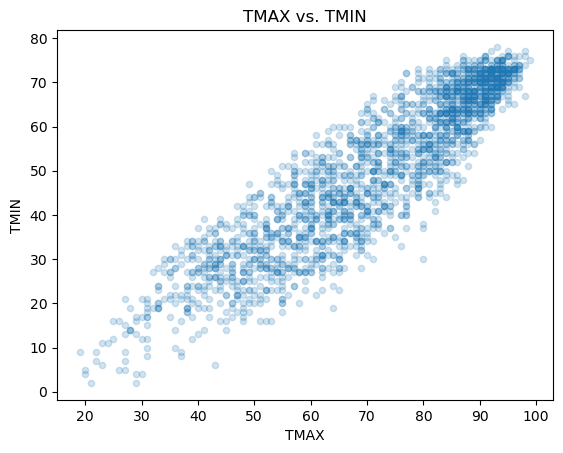

In [22]:
bna.plot(kind="scatter", x="TMAX", y="TMIN", alpha=0.2)
plt.title("TMAX vs. TMIN")

    d. You will notice that TMAX_6MO has a strong negative correlation with TMAX. Can you explain why this is?

ANSWER: Because it is the oposite season.

    e. You will notice that TMAX_3MO has a very weak correlation with TMAX. Can you explain why this is?

ANSWER: Because it is the prior season.

2. Read in the file shifted_LAX_temps.csv into a DataFrame named lax.

In [23]:
lax = pd.read_csv("../data/shifted_LAX_temps.csv")
lax

,NAME,DATE,TMIN,TMAX,TMAX_YESTERDAY,TMAX_3MO,TMAX_6MO,TMAX_LY
0,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",2013-01-01,44.0,61.0,59.0,83.0,71.0,81.0
1,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",2013-01-02,44.0,62.0,61.0,85.0,72.0,75.0
2,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",2013-01-03,43.0,70.0,62.0,76.0,71.0,76.0
3,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",2013-01-04,46.0,66.0,70.0,71.0,70.0,85.0
4,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",2013-01-05,42.0,62.0,66.0,72.0,70.0,83.0
...,...,...,...,...,...,...,...,...
2127,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",2018-12-26,48.0,65.0,67.0,71.0,72.0,64.0
2128,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",2018-12-27,48.0,67.0,65.0,71.0,72.0,74.0
2129,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",2018-12-28,49.0,61.0,67.0,74.0,72.0,72.0
2130,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",2018-12-29,40.0,61.0,61.0,76.0,74.0,79.0


    a. Before doing any calculations, how do you think that the correlations for LAX will compare to those that you saw for BNA? Will the correlations be stronger than what you saw for BNA? weaker? about the same?

ANSWER: About the same

    b. Calculate the correlation between TMAX and all other temperature columns. Were you guesses from the previous question correct?

In [24]:
lax[['TMIN', 'TMAX', 'TMAX_YESTERDAY', 'TMAX_3MO', 'TMAX_6MO', 'TMAX_LY']].corr()
lax.corr(numeric_only=True).loc['TMAX'].sort_values()

TMAX_6MO         -0.246964
TMAX_3MO         -0.034787
TMAX_LY           0.289027
TMIN              0.634391
TMAX_YESTERDAY    0.815295
TMAX              1.000000
Name: TMAX, dtype: float64

    c. You'll notice that the correlation between TMAX and TMIN is much smaller for LAX compared to BNA. Create a scatterplot showing TMAX vs TMIN for LAX. What would explain the lower correlation?

Text(0.5, 1.0, 'TMAX vs. TMIN')

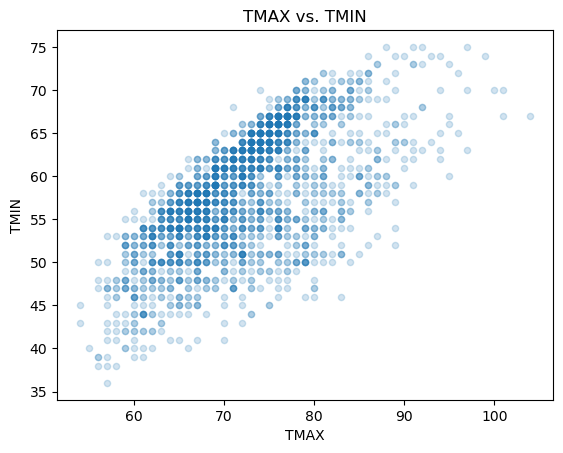

In [25]:
lax.plot(kind="scatter", x="TMAX", y="TMIN", alpha=0.2)
plt.title("TMAX vs. TMIN")

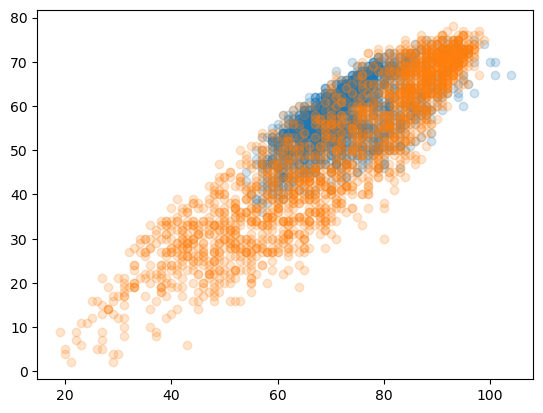

In [28]:
plt.scatter(x=lax['TMAX'], y=lax['TMIN'], alpha=0.2)
plt.scatter(x=bna['TMAX'], y=bna['TMIN'], alpha=0.2)

LAX has milder tempuratures.

### Part 2: Penguins 

The file pengiuns.csv contains the [Palmer Penguins dataset](https://allisonhorst.github.io/palmerpenguins/articles/intro.html), which contains size measurements for three penguin species observed on three islands in the Palmer Archipelago of Antarctica.

Read this dataset into a dataframe named *penguins*.

In [29]:
penguins = pd.read_csv("../data/penguins.csv")
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


1. How many missing values are in this dataset? After checking this, use the dropna() method to remove any missing values.

In [30]:
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [31]:
penguins = penguins.dropna()

2. Examine the distribution of penguin species by island. What do you find? (You might want to create a plot or two to aid in your analysis)

<Axes: xlabel='species'>

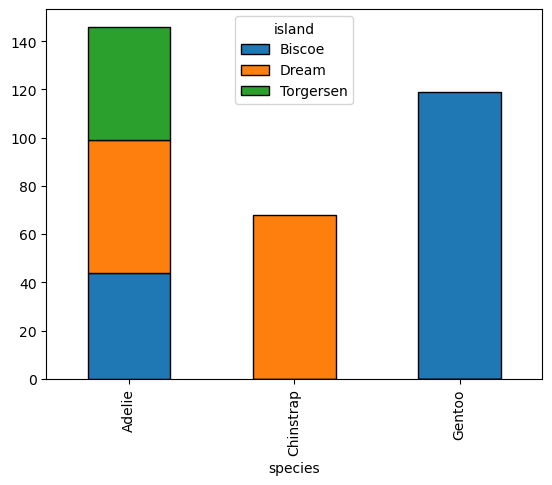

In [32]:
pd.crosstab(
    index=penguins['species'],
    columns=penguins['island']
).plot(
    kind="bar",
    edgecolor="black",
    stacked=True
)

<Axes: xlabel='species'>

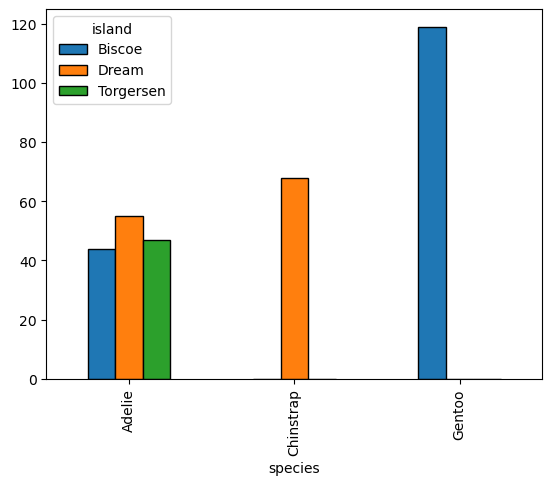

In [40]:
pd.crosstab(
    index=penguins['species'],
    columns=penguins['island']
).plot(
    kind="bar",
    edgecolor="black"
)

3. What do you find if you examine the distribution of weights by species?

<Axes: xlabel='species'>

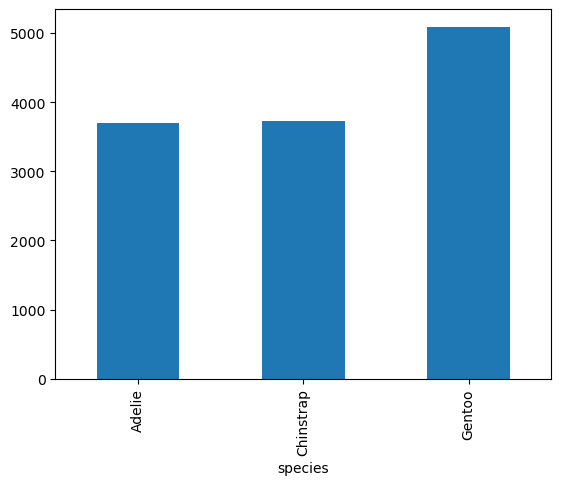

In [33]:
penguins.groupby("species")['body_mass_g'].mean().plot(kind="bar")

In [42]:
penguins.groupby("species")['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Adelie,146.0,3706.164384,458.620135,2850.0,3362.5,3700.0,4000.0,4775.0
Chinstrap,68.0,3733.088235,384.335081,2700.0,3487.5,3700.0,3950.0,4800.0
Gentoo,119.0,5092.436975,501.476154,3950.0,4700.0,5050.0,5500.0,6300.0


<Axes: xlabel='species', ylabel='body_mass_g'>

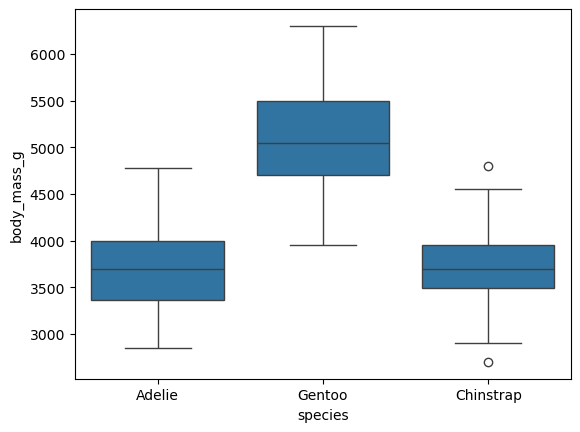

In [43]:
sns.boxplot(data=penguins, x="species", y="body_mass_g")

4. Create a scatterplot of bill depth vs. bill length. What do you notice from the scatterplot? What is the correlation between bill depth and bill length?

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

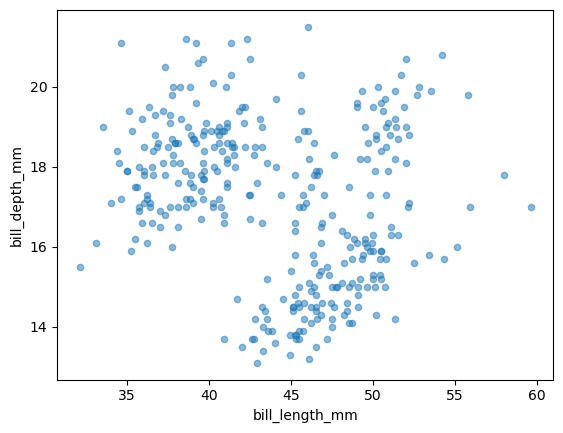

In [44]:
penguins.plot(kind="scatter", x="bill_length_mm", y="bill_depth_mm", alpha=0.5)

5. Color the scatterplot from the previous question by species. What do you notice now?

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

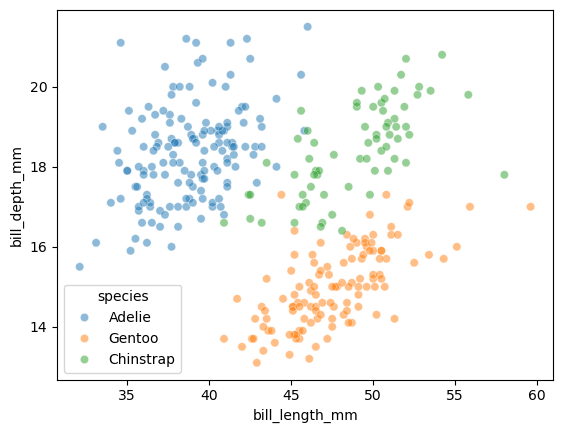

In [45]:
sns.scatterplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", alpha=0.5)

6. Are there major differences in the distribution of species observed across the three years that the data was collected?

In [48]:
penguins.groupby("year")['species'].describe()

,count,unique,top,freq
year,,,,
2007,103,3,Adelie,44
2008,113,3,Adelie,50
2009,117,3,Adelie,52


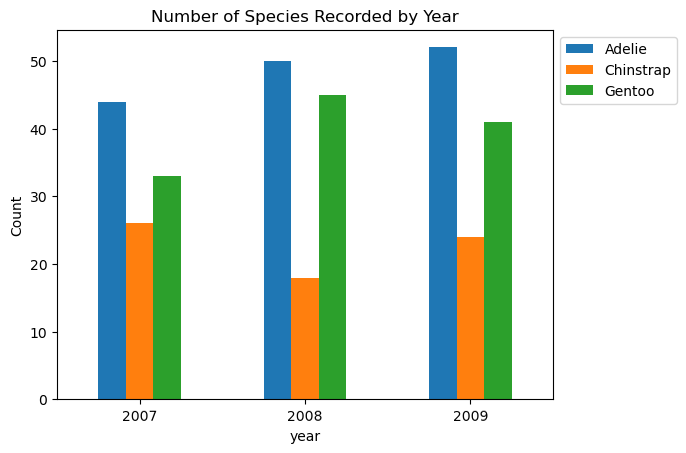

In [49]:
pd.crosstab(penguins['year'], penguins['species']).plot(kind='bar', rot=.5)
plt.title('Number of Species Recorded by Year')
plt.ylabel('Count')
plt.legend(bbox_to_anchor = (1,1));

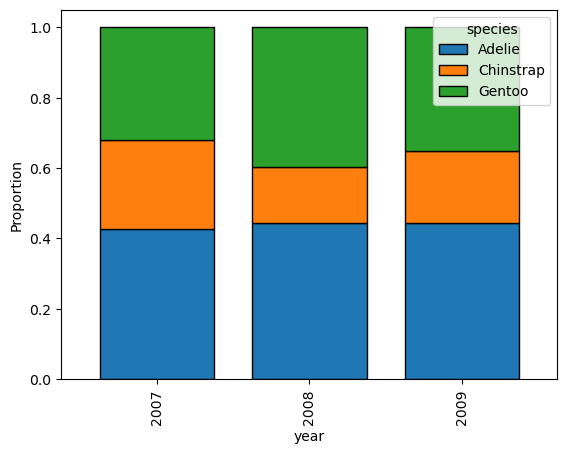

In [52]:
pd.crosstab(penguins['year'], penguins['species'], normalize='index').plot(
                                    kind = 'bar', 
                                    edgecolor = 'black', 
                                    width = 0.75,
                                    stacked = True)
plt.ylabel('Proportion');

7. Inspect the relationship between body mass and flipper length. How is the relationship between these variables different than the one between bill length and bill depth that we observed above?

<Axes: xlabel='body_mass_g', ylabel='flipper_length_mm'>

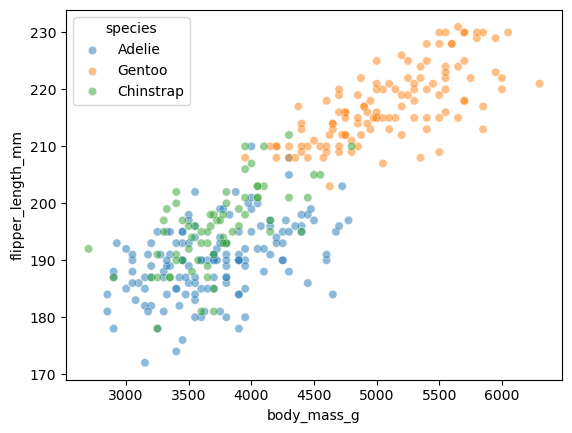

In [38]:
sns.scatterplot(data=penguins, x="body_mass_g", y="flipper_length_mm", hue="species", alpha=0.5)

8. How does the distribution of body mass differ between male and female observations?

Text(0.5, 1.0, 'Weight by Species/Sex')

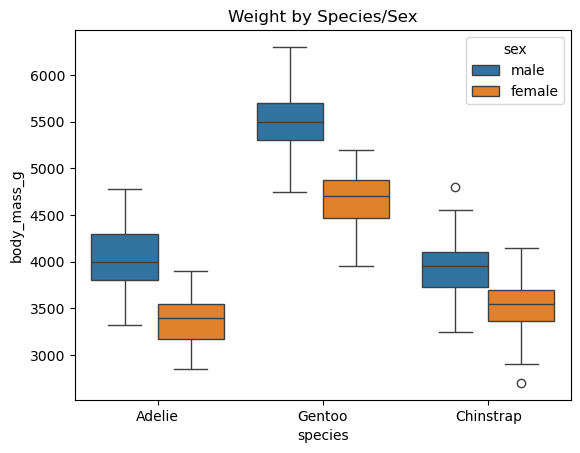

In [55]:
sns.boxplot(data = penguins, x = 'species', y = 'body_mass_g', hue = 'sex')
plt.title('Weight by Species/Sex')

9. You can group by multiple variables simultaneously by passing a list into your groupby method. What do the differences in body mass between male and female penguins look like at a species level?

In [58]:
penguins.groupby(['species', 'sex'])['body_mass_g'].describe()

count         mean         std     min      25%     50%  \
species   sex                                                               
Adelie    female   73.0  3368.835616  269.380102  2850.0  3175.00  3400.0   
          male     73.0  4043.493151  346.811553  3325.0  3800.00  4000.0   
Chinstrap female   34.0  3527.205882  285.333912  2700.0  3362.50  3550.0   
          male     34.0  3938.970588  362.137550  3250.0  3731.25  3950.0   
Gentoo    female   58.0  4679.741379  281.578294  3950.0  4462.50  4700.0   
          male     61.0  5484.836066  313.158596  4750.0  5300.00  5500.0   

                      75%     max  
species   sex                      
Adelie    female  3550.00  3900.0  
          male    4300.00  4775.0  
Chinstrap female  3693.75  4150.0  
          male    4100.00  4800.0  
Gentoo    female  4875.00  5200.0  
          male    5700.00  6300.0